Import libraries

In [1]:
from Model.svm_smo import *
from Model.svm_plot_2D import *
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from Plots.Confussion_matrix import *
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

Create train and test sets

In [2]:
X, y = make_blobs(n_samples=300, centers=2, random_state=17, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

Call created SVM_SMO model

In [3]:
#A
kernels = ["linear", "rbf", "poly"]
for i in kernels:
    model = Support_Vector_Machines_SMO(kernel=i, C=1, degree=3, gamma=1, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Kernel: {}".format(i))
    print("Intercept: {}".format(model.b))
    try:
        print("Coefficient: {}".format(model.w))
    except:
        pass
    print("Number of support vectors: {}".format(len(model.support_vectors_)))

Kernel: linear
Intercept: -8.08682084071235
Coefficient: [-1.40644744 -1.41862128]
Number of support vectors: 34
Iterations exceeded max_iter
Kernel: rbf
Intercept: 0.14533008576950138
Number of support vectors: 193
Kernel: poly
Intercept: 13.959306217115667
Number of support vectors: 123


Confussion matrix

Iterations exceeded max_iter
TRAIN:


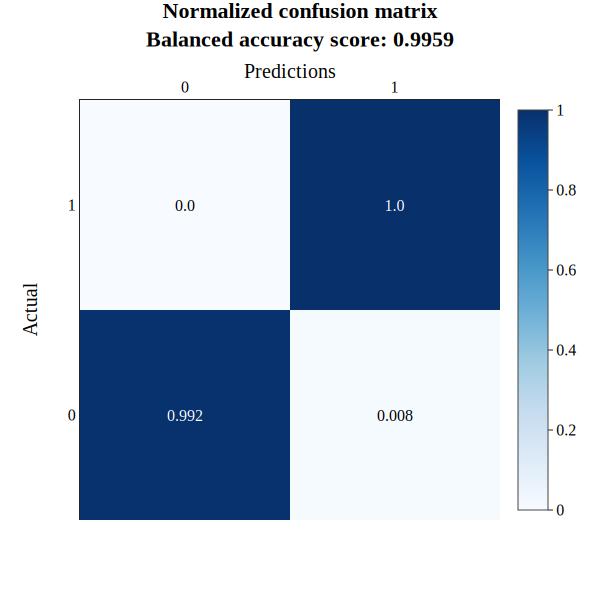

TEST:


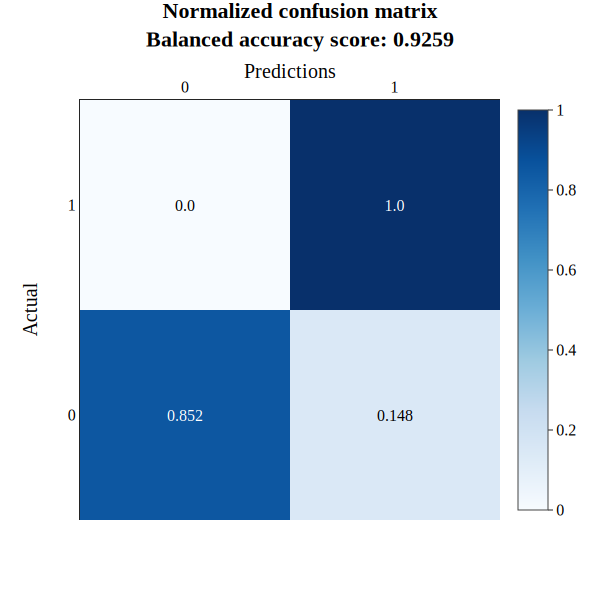

In [4]:
model = Support_Vector_Machines_SMO(kernel="rbf", C=1, gamma=1, max_iter=500)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("TRAIN:")
conf_matrix(y_true=y_train, predictions=y_pred_train, normalize=True)
print("TEST:")
conf_matrix(y_true=y_test, predictions=y_pred_test, normalize=True)

Because of high memory usage by plotly I decided to not run below cells but You can simply paste code in Your notebook and see charts in browser.

Plot hyperplane of SVM for different values of C

Linear kernel

In [ ]:
svm_plots_with_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, values=[0.01, 1, 100], param_name="C", kernel="linear").create_subplot()

Plot hyperplane of SVM for different values of gamma

RBF kernel

In [ ]:
svm_plots_with_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, values=[0.01, 1, 100], param_name="gamma", kernel="rbf").create_subplot()